# Traffic-Ticket Data

Exploratory analysis of over 6 million traffic-tickets from 2014-2017

- [Data overview and cleaning](#Data-overview-and-cleaning)
    - [Columns](#Columns)   
    - [Remove garbage values](#Remove-garbage-values)
    - [Fix mixed types error](#Fix-mixed-types-error)
- [Top 10 Traffic Violations](#Top-10-Traffic-Violations)
- [Traffic Violations by Gender](#Traffic-Violations-by-Gender)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_csv('./Traffic_Tickets_Issued__Four_Year_Window.csv')

C:\Users\dacrands\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*This error will be addressed in the next section*

## Data overview and cleaning

In [3]:
"Total rows: {:,}".format(len(traffic_tickets))

'Total rows: 6,298,032'

### Columns

View dframe columns

In [4]:
for col in traffic_tickets.columns:
    print(col + "\r")

Violation Charged Code
Violation Description
Violation Year
Violation Month
Violation Day of Week
Age at Violation
Gender
State of License
Police Agency
Court
Source


Create new dframe with cols of interest

In [5]:
traffic_tickets = traffic_tickets[[
    "Violation Description", 
    "Violation Year", 
    "Violation Month",
    "Violation Day of Week", 
    "Age at Violation", 
    "State of License", 
    "Gender",
]]

traffic_tickets.columns

Index(['Violation Description', 'Violation Year', 'Violation Month',
       'Violation Day of Week', 'Age at Violation', 'State of License',
       'Gender'],
      dtype='object')

Create shorter col names

In [6]:
traffic_tickets = traffic_tickets.rename(columns={
    'Violation Description': 'Violation', 
    'Violation Year': 'Year', 
    'Violation Month': 'Month', 
    'Violation Day of Week': 'Day',
    'Age at Violation': 'Age', 
    'State of License': 'State'
})

traffic_tickets.columns

Index(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'], dtype='object')

### Remove garbage values

In [7]:
traffic_tickets.head()

,Violation,Year,Month,Day,Age,State,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,3.0,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,3.0,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,2.0,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,2.0,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,1.0,THURSDAY,25.0,NEW YORK,M


In [8]:
traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298027,OPER MV WHILE USING PORTABLE ELEC DEV,20{,NaN,NaN,NaN,NaN,NaN
6298028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create new dframe sans the trailing garbage values

In [9]:
traffic_tickets = traffic_tickets[:6298027]

traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298022,OPERATING MV MOBILE PHONE,2017,8.0,MONDAY,29.0,NEW YORK,M
6298023,PLATE MISSING/INSECURE/DIRTY,2017,8.0,MONDAY,46.0,NEW YORK,M
6298024,DISOBEYED TRAFFIC DEVICE,2017,8.0,MONDAY,22.0,MARYLAND,M
6298025,IMPROPER SIGNAL,2017,8.0,MONDAY,36.0,NEW JERSEY,M
6298026,COM VEH ON PKWAY NYC,2017,8.0,MONDAY,42.0,NEW YORK,M


### Fix mixed types error 

Address `DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False`

In [10]:
traffic_ticket_sets = {}
for col in traffic_tickets.columns:
    traffic_ticket_sets[col] = set(traffic_tickets[col])

traffic_ticket_sets.keys()

dict_keys(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'])

In [11]:
for key in traffic_ticket_sets.keys():
    print("{0}: {1}".format(
        key,
        set([type(i) for i in traffic_ticket_sets[key]])))

Violation: {<class 'str'>}
Year: {<class 'int'>, <class 'str'>}
Month: {<class 'numpy.float64'>}
Day: {<class 'str'>}
Age: {<class 'numpy.float64'>}
State: {<class 'str'>, <class 'float'>}
Gender: {<class 'str'>}


So it seems the cols containing mixed-types are `Year` and `State`. Let's fix that.

In [12]:
traffic_ticket_sets["Year"]

{2016, 2017, '2017', 2014, 2015}

In [13]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

In [14]:
set(traffic_tickets.Year)

{2014, 2015, 2016, 2017}

In [15]:
len(traffic_ticket_sets["State"])

78

In [16]:
traffic_ticket_sets["State"]

{'DISTRICT OF COLUMBIA',
 'DELAWARE',
 nan,
 'MISSOURI',
 'FOREIGN LICENSE',
 'WASHINGTON',
 'CALIFORNIA',
 'NEW BRUNSWICK CANADA',
 'OKLAHOMA',
 'SOUTH CAROLINA',
 'US GOVERNMENT',
 'MONTANA',
 'ARIZONA',
 'MARYLAND',
 'COLORADO',
 'PENNSYLVANIA',
 'NEW HAMPSHIRE',
 'SASKATCHEWAN CANADA',
 'MICHIGAN',
 'AMERICAN SAMOA',
 'FLORIDA',
 'NEBRASKA',
 'ALASKA',
 'GUAM',
 'LOUISIANA',
 'HAWAII',
 'WYOMING',
 'UTAH',
 'KENTUCKY',
 'ALBERTA CANADA',
 'MEXICO',
 'ILLINOIS',
 'RHODE ISLAND',
 'US FOREIGN DIPLOMATS',
 'YUKON TERRITORY CANADA',
 'CONNECTICUT',
 'INDIANA',
 'IDAHO',
 'UNKNOWN',
 'VERMONT',
 'NEW YORK',
 'NEVADA',
 'OREGON',
 'NORTH CAROLINA',
 'TEXAS',
 'NUNAVUT CANADA',
 'MISSISSIPPI',
 'NEWFOUNDLAND CANADA',
 'VIRGIN ISLANDS',
 'IOWA',
 'PANAMA',
 'MANITOBA',
 'NEW JERSEY',
 'ARKANSAS',
 'NOVA SCOTIA CANADA',
 'SOUTH DAKOTA',
 'MASSACHUSETTS',
 'NEW MEXICO',
 'QUEBEC CANADA',
 'WEST VIRGINIA',
 'KANSAS',
 'VIRGINIA',
 'OHIO',
 'PRINCE EDWARD ISLAND CANADA',
 'INTERNATIONAL LICENS

List of states provided by:
    
[List of states repo](https://gist.github.com/iamjason/8f8f4bc00c13de86bcad)

In [17]:
states = ["Alaska",
          "Alabama",
          "Arkansas",
          "American Samoa",
          "Arizona",
          "California",
          "Colorado",
          "Connecticut",
          "District of Columbia",
          "Delaware",
          "Florida",
          "Georgia",
          "Guam",
          "Hawaii",
          "Iowa",
          "Idaho",
          "Illinois",
          "Indiana",
          "Kansas",
          "Kentucky",
          "Louisiana",
          "Massachusetts",
          "Maryland",
          "Maine",
          "Michigan",
          "Minnesota",
          "Missouri",
          "Mississippi",
          "Montana",
          "North Carolina",
          "North Dakota",
          "Nebraska",
          "New Hampshire",
          "New Jersey",
          "New Mexico",
          "Nevada",
          "New York",
          "Ohio",
          "Oklahoma",
          "Oregon",
          "Pennsylvania",
          "Puerto Rico",
          "Rhode Island",
          "South Carolina",
          "South Dakota",
          "Tennessee",
          "Texas",
          "Utah",
          "Virginia",
          "Virgin Islands",
          "Vermont",
          "Washington",
          "Wisconsin",
          "West Virginia",
          "Wyoming"]

states = [s.upper() for s in states]

In [18]:
weird_states = [col_s for col_s in traffic_ticket_sets["State"] if
                    str(col_s) not in [fifty_s for fifty_s in states]]
print(len(weird_states))
for ws in weird_states:
    print(ws)

23
nan
FOREIGN LICENSE
NEW BRUNSWICK CANADA
US GOVERNMENT
SASKATCHEWAN CANADA
ALBERTA CANADA
MEXICO
US FOREIGN DIPLOMATS
YUKON TERRITORY CANADA
UNKNOWN
NUNAVUT CANADA
NEWFOUNDLAND CANADA
PANAMA
MANITOBA
NOVA SCOTIA CANADA
QUEBEC CANADA
PRINCE EDWARD ISLAND CANADA
INTERNATIONAL LICENSE
ONTARIO CANADA
ARMED FORCES
NORTHWEST TERRITORIES CANADA
BRITISH COLUMBIA CANADA
ARMED FORCES AMERICA


In [19]:
traffic_tickets = traffic_tickets[~traffic_tickets.State.isin(weird_states)]

In [20]:
set(traffic_tickets.State)

{'DISTRICT OF COLUMBIA',
 'DELAWARE',
 nan,
 'MISSOURI',
 'WASHINGTON',
 'CALIFORNIA',
 'OKLAHOMA',
 'SOUTH CAROLINA',
 'MONTANA',
 'ARIZONA',
 'MARYLAND',
 'COLORADO',
 'PENNSYLVANIA',
 'NEW HAMPSHIRE',
 'MICHIGAN',
 'AMERICAN SAMOA',
 'FLORIDA',
 'NEBRASKA',
 'ALASKA',
 'GUAM',
 'LOUISIANA',
 'HAWAII',
 'WYOMING',
 'UTAH',
 'KENTUCKY',
 'ILLINOIS',
 'RHODE ISLAND',
 'CONNECTICUT',
 'INDIANA',
 'IDAHO',
 'VERMONT',
 'NEW YORK',
 'NEVADA',
 'OREGON',
 'NORTH CAROLINA',
 'TEXAS',
 'MISSISSIPPI',
 'VIRGIN ISLANDS',
 'IOWA',
 'NEW JERSEY',
 'ARKANSAS',
 'SOUTH DAKOTA',
 'MASSACHUSETTS',
 'NEW MEXICO',
 'WEST VIRGINIA',
 'KANSAS',
 'VIRGINIA',
 'OHIO',
 'NORTH DAKOTA',
 'GEORGIA',
 'PUERTO RICO',
 'TENNESSEE',
 'WISCONSIN',
 'MAINE',
 'MINNESOTA',
 'ALABAMA'}

In [21]:
traffic_tickets = traffic_tickets.dropna()

In [22]:
set(traffic_tickets.State)

{'ALABAMA',
 'ALASKA',
 'AMERICAN SAMOA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'GUAM',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'PUERTO RICO',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGIN ISLANDS',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING'}

In [23]:
len(set(traffic_tickets.State))

55

## Graph Config

In [35]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.style.use('seaborn')
plt.style.use('dark_background')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

## Top 10 Traffic Violations

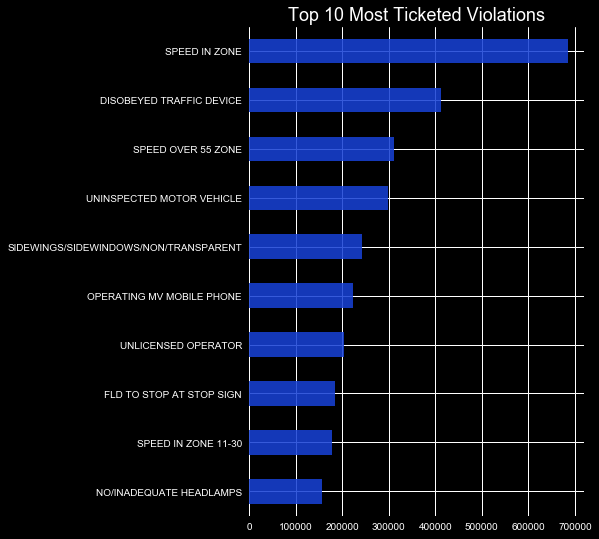

In [46]:
traffic_tickets \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", figsize=(6,9), color="#1841d5de", title="Top 10 Most Ticketed Violations") \
    .invert_yaxis()


plt.savefig("top-10-violations.png", bbox_inches="tight", pad_inches=0.2, dpi=120)

## Traffic Violations by Gender

In [37]:
traffic_tickets.Gender.value_counts()

M    4186645
F    1744887
Name: Gender, dtype: int64

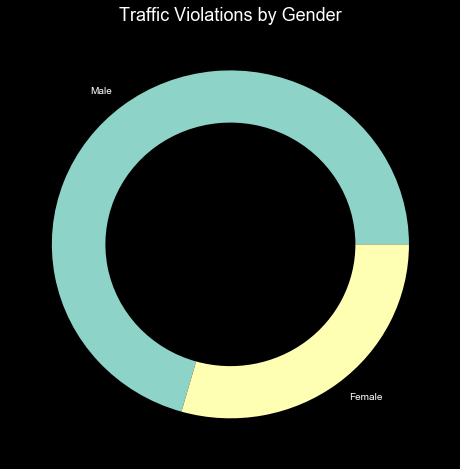

In [60]:
traffic_tickets \
    .Gender.value_counts() \
    .plot(kind="pie", 
          figsize=(8,8), 
          wedgeprops=dict(width=0.3), 
          labels=["Male", "Female"], 
          title="Traffic Violations by Gender") \
    .set_ylabel('')

plt.savefig("gender-pie.jpg", bbox_inches="tight", dpi=120, pad_inches=0.2)

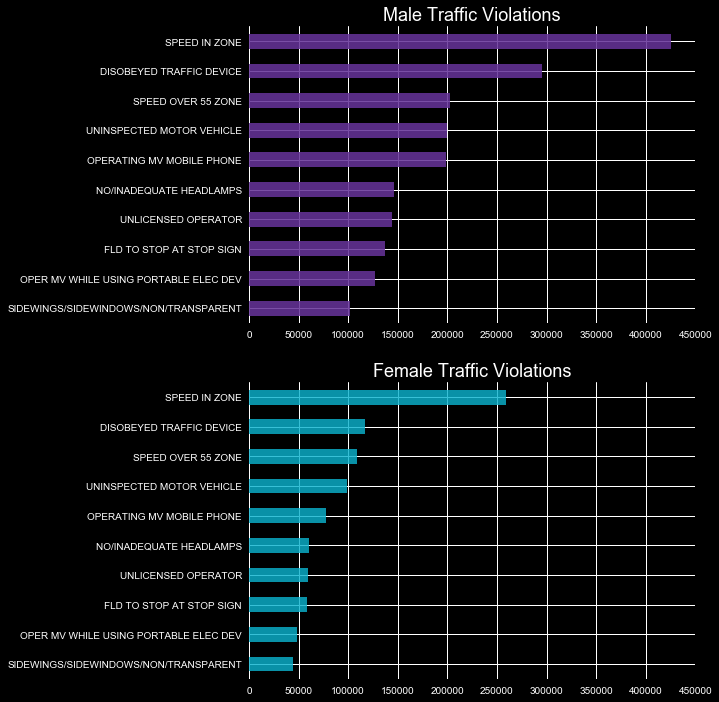

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 12))

traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", ax=ax1, title="Male Traffic Violations", color="#663399de") 

traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", ax=ax2, title="Female Traffic Violations", color="#0cb2cdd1") 

ax1.invert_yaxis()
ax1.set_xlim(right=450000)
ax2.set_xlim(right=450000)

plt.savefig("gender-bar.jpg", bbox_inches="tight", pad_inches=0.2, dpi=200)

## Traffic Violations by Age

In [34]:
traffic_tickets.Age.describe().apply(lambda x: format(x, 'f'))

count    5931532.000000
mean          36.698954
std           13.903908
min           16.000000
25%           25.000000
50%           34.000000
75%           47.000000
max           95.000000
Name: Age, dtype: object

In [54]:
traffic_tickets.Age.median()

34.0

In [55]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

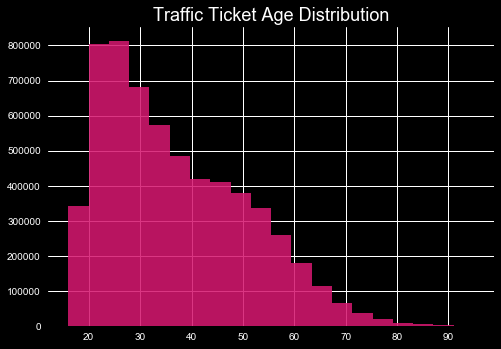

In [64]:
plt.hist(traffic_tickets.Age.dropna(), bins=20, color="#d5186fde")
plt.title("Traffic Ticket Age Distribution")

plt.savefig("age-dist.svg", bbox_inches="tight", pad_inches=0.2, dpi=200)